<a href="https://colab.research.google.com/github/Dhanushaiml/Dhanushaiml/blob/main/miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix,classification_report

##Reading & Understanding Our Data

In [43]:
# Load the Dataset
df = pd.read_csv("/content/mini project data set.csv", encoding = 'latin-1') # <--- REPLACE THIS PATH
df.sample(5500)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1829,spam,Hottest pics straight to your phone!! See me g...,NaN,NaN,NaN
820,ham,Good afternoon starshine! How's my boytoy? Doe...,NaN,NaN,NaN
4094,ham,I ain't answerin no phone at what is actually ...,NaN,NaN,NaN
4622,ham,U need my presnts always bcz U cant mis love. ...,NaN,NaN,NaN
114,ham,"Wa, ur openin sentence very formal... Anyway, ...",NaN,NaN,NaN
...,...,...,...,...,...
5433,ham,You're gonna have to be way more specific than...,NaN,NaN,NaN
550,ham,Imagine you finally get to sink into that bath...,NaN,NaN,NaN
568,ham,Love it! Daddy will make you scream with pleas...,NaN,NaN,NaN
2574,spam,Your next amazing xxx PICSFREE1 video will be ...,NaN,NaN,NaN


In [44]:
df.shape

(5572, 5)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [46]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [47]:
# rename the columns
df.rename(columns={'v1': 'Target','v2': 'Text'},inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
# Check missing values
df.isnull().sum()

,0
Target,0
Text,0


In [49]:
# check duplicate values
(df.duplicated().sum())
# Remove Duplicate values
df = df.drop_duplicates(keep='first')

In [50]:
df.shape

(5169, 2)

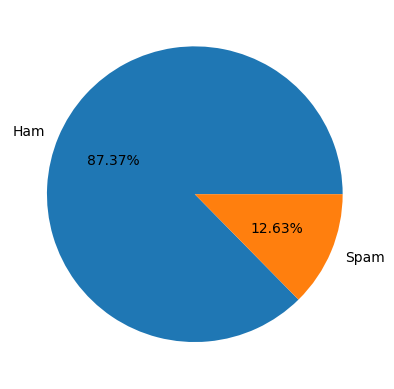

In [51]:
plt.pie(df['Target'].value_counts(),labels = ['Ham','Spam'],autopct="%0.2f%%")
plt.show()

In [52]:
nltk.download('punkt')
nltk.download('punkt_tab') # Added to address the specific LookupError
# Number of Character
df['num_character'] = df['Text'].apply(len)
# Number of Words
df['num_words'] = df['Text'].apply(lambda x : len(nltk.word_tokenize(x)))
# Number of sentence
df['num_sentences'] = df['Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Target,Text,num_character,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [53]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


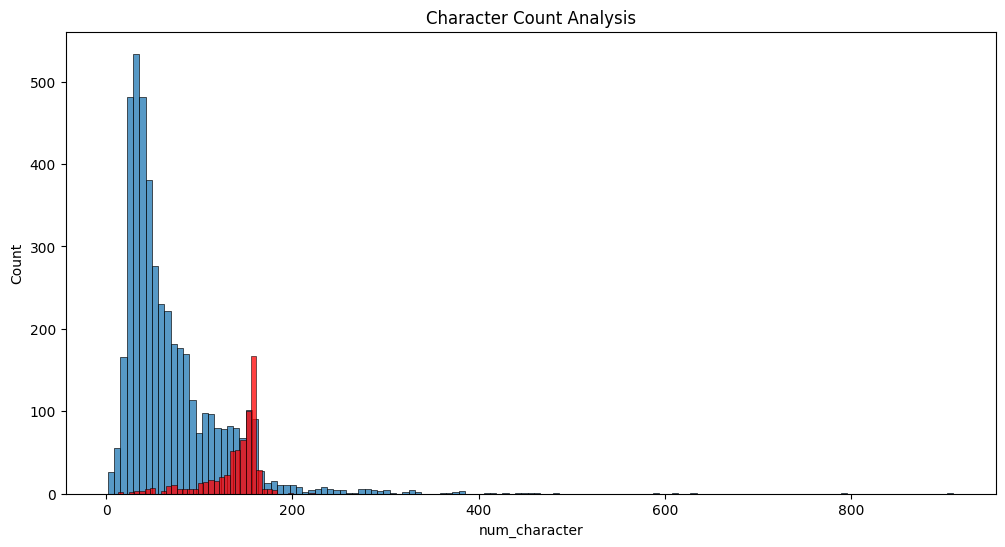

In [54]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Target'] == 'ham' ]['num_character'])
sns.histplot(df[df['Target'] == 'spam' ]['num_character'],color='red')
plt.title("Character Count Analysis")
plt.show()



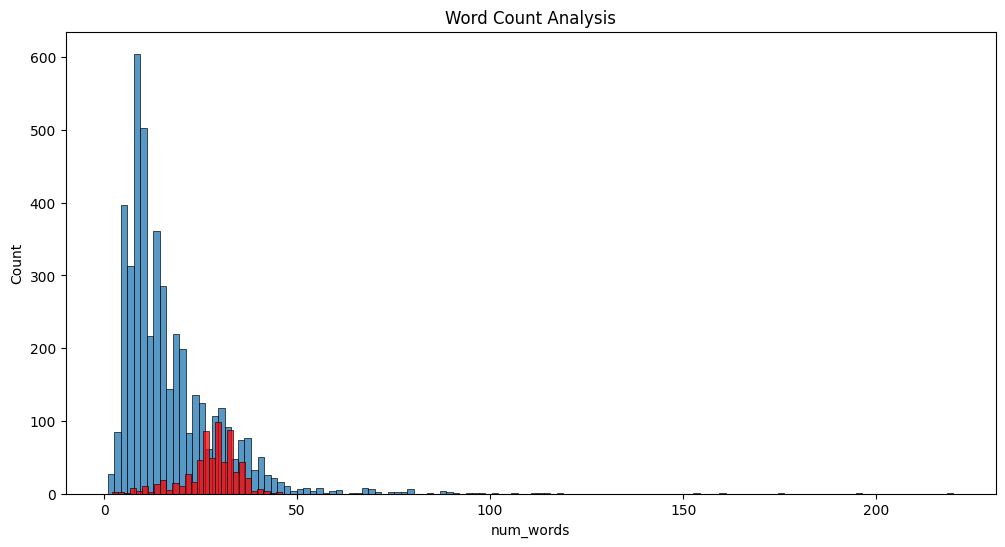

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 'ham']['num_words'])
sns.histplot(df[df['Target'] == 'spam']['num_words'],color='red')
plt.title("Word Count Analysis")
plt.show()



##Text Preprocessing

In [56]:
nltk.download('stopwords')
ps = PorterStemmer()

def clean_text(Text):
    # Lowercase
    Text = Text.lower()
    # Tokenize
    Text = nltk.word_tokenize(Text)

    # Remove non-alphanumeric
    y = []
    for word in Text:
        if word.isalnum():
            y.append(word)

    Text = y[:]
    y.clear()

    # Remove stopwords and punctuation, and apply stemming
    for word in Text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(ps.stem(word))

    return " ".join(y)

# Apply cleaning
df['cleaned_text'] = df['Text'].apply(clean_text)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Target,Text,num_character,num_words,num_sentences,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


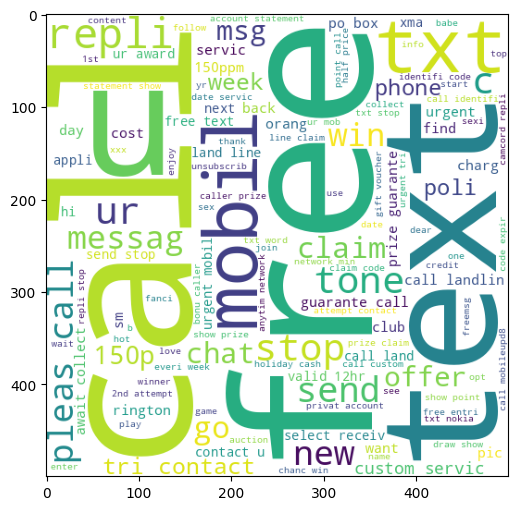

In [57]:
# Spam words
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['Target'] == 'spam' ]['cleaned_text'].str.cat(sep=" "))
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)
plt.show()



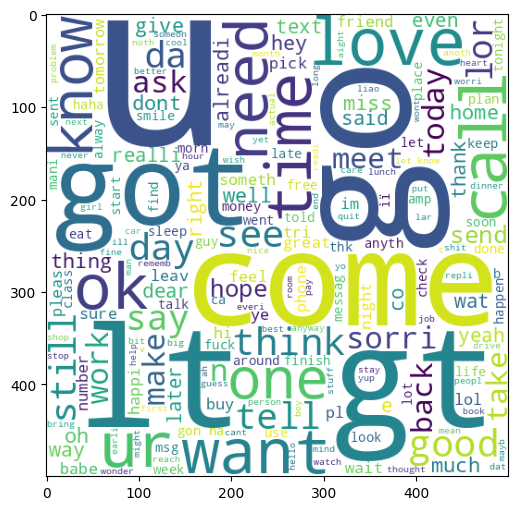

In [58]:
# Ham words
wc = WordCloud(width = 500, height = 500, min_font_size=10, background_color='white')
ham_wc = wc.generate(df[df['Target'] == 'ham' ]['cleaned_text'].str.cat(sep=" "))
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)
plt.show()

In [59]:
# Extract spam messages
spam_corpus = []
for msg in df[df['Target'] == 'spam']['cleaned_text'].tolist():
   for word in msg.split():
       spam_corpus.append(word)
print("Length of spam corpus",len(spam_corpus))


Length of spam corpus 9939


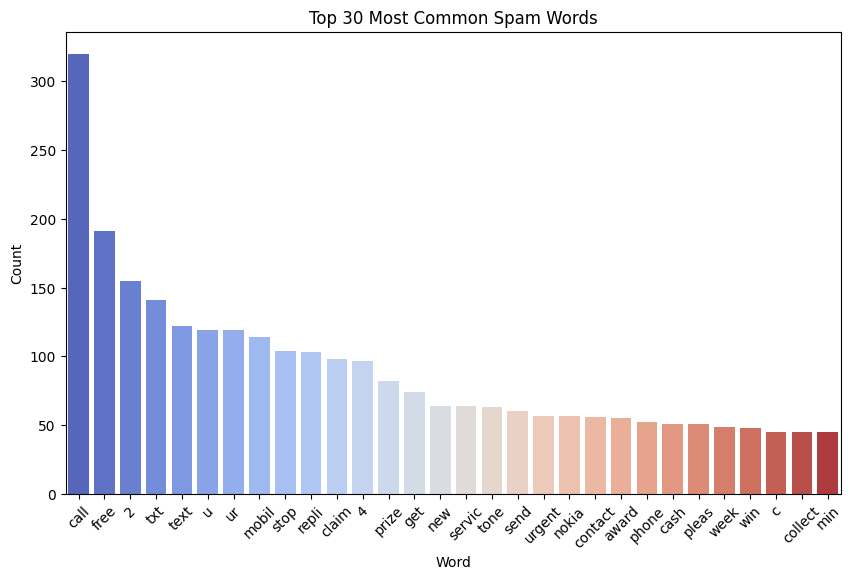

In [60]:
# Create DataFrame from the 30 most common spam words
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using named arguments
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=spam_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 30 Most Common Spam Words")
plt.show()





Top Word Frequency:

In [61]:
# Extract Ham messages
ham_corpus = []
for msg in df[df['Target'] == 'ham']['cleaned_text'].tolist():
   for word in msg.split():
       ham_corpus.append(word)
print("Length of Ham corpus",len(ham_corpus))

Length of Ham corpus 35404


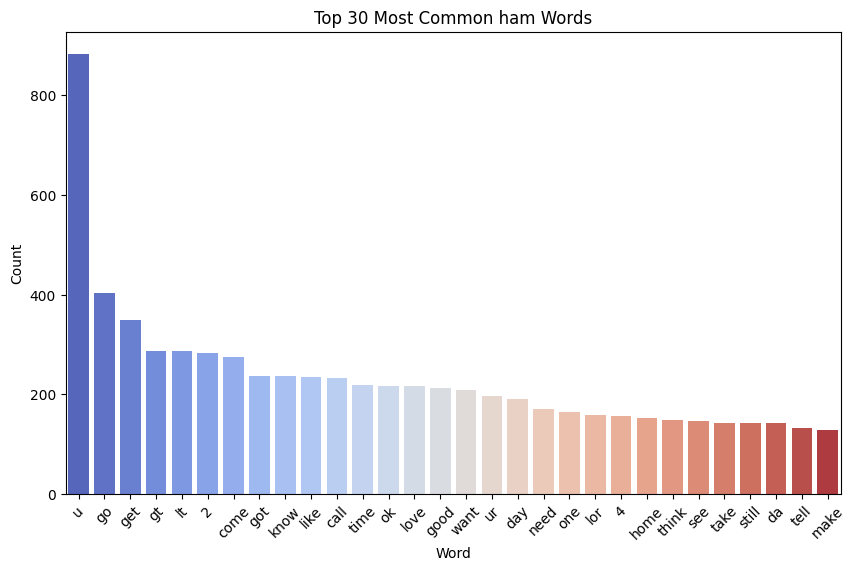

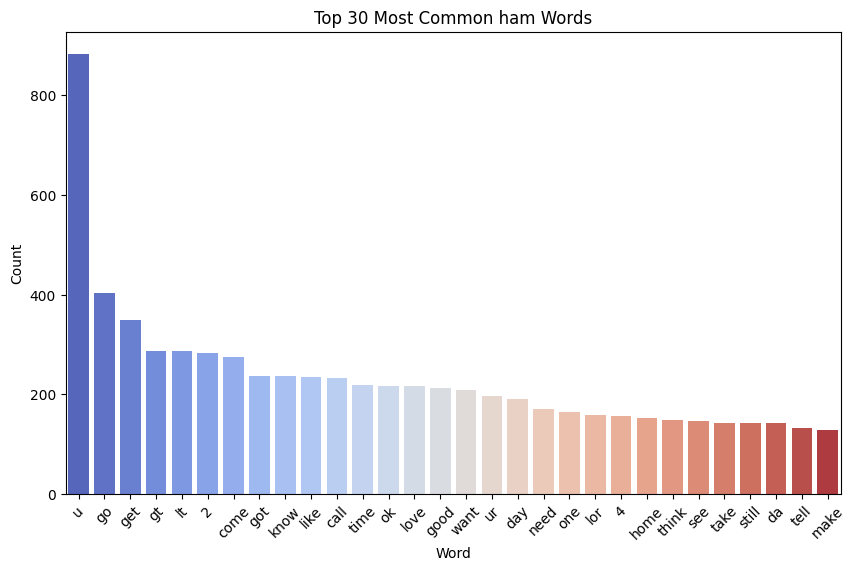

In [62]:
# Create DataFrame from the 30 most common spam words
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using named arguments
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=ham_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 30 Most Common ham Words")
plt.show()# Create DataFrame from the 30 most common spam words
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])

# Plot using named arguments
plt.figure(figsize=(10,6))
sns.barplot(x='Word', y='Count', data=ham_df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Top 30 Most Common ham Words")
plt.show()

##Feature Engineering (TF-IDF Vectorization)

In [63]:
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target']) # ham = 0, spam = 1
tfidf = TfidfVectorizer(max_features=3000)# limit to top 3000 frequent words
X = tfidf.fit_transform(df['cleaned_text']).toarray()
X.shape

(5169, 3000)

In [64]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

##Model Building & Evaluation

Train & Test split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)
# Check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

##Train the Model

In [66]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

##Make Predictions

In [67]:
y_pred = mnb.predict(X_test)

##Evaluation

In [68]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("/nConfusion Matrix:", confusion_matrix(y_test,y_pred))
print("/nClassification Report:/n",classification_report(y_test,y_pred))
print("Precision Score:" , precision_score(y_test,y_pred))

Accuracy: 0.9709864603481625
/nConfusion Matrix: [[896   0]
 [ 30 108]]
/nClassification Report:/n               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

Precision Score: 1.0


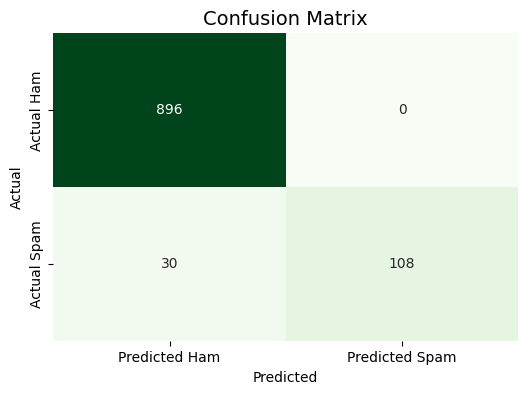

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



## Hyperparameter Tuning



In [70]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Multinomial Naive Bayes
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Create an instance of MultinomialNB
mnb = MultinomialNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

Best Parameters: {'alpha': 0.1}
Best Cross-validation Score: 0.9808948004836759


## Retrain Model with Best Parameters




In [71]:
best_alpha = grid_search.best_params_['alpha']
optimized_mnb = MultinomialNB(alpha=best_alpha)
optimized_mnb.fit(X_train, y_train)
print("Optimized Multinomial Naive Bayes model trained with alpha:", best_alpha)

Optimized Multinomial Naive Bayes model trained with alpha: 0.1


## Build and Test Prediction Function



In [72]:
def predict_message(message):
    # 1. Preprocess the message using the same cleaning function
    cleaned_message = clean_text(message)

    # 2. Transform the cleaned message using the fitted TF-IDF vectorizer
    # We need to reshape for a single sample
    vectorized_message = tfidf.transform([cleaned_message]).toarray()

    # 3. Make a prediction using the optimized model
    prediction = optimized_mnb.predict(vectorized_message)[0]

    # 4. Map the prediction back to 'ham' or 'spam'
    if prediction == 0:
        return 'ham'
    else:
        return 'spam'

# Test the prediction function with some example messages
print("Prediction for 'Free entry into a contest! Text now!':", predict_message('You have been selected as the winner of our annual Global Sweepstakes! You have won a brand new iPhone 15 and a cash prize of $5,000!!'))
print("Prediction for 'Hey, how are you doing today?':", predict_message('Hey, how are you doing today?'))
print("Prediction for 'WINNER! You have won a prize. Claim your reward!':", predict_message('''To claim your prize, simply reply to this email with your full name and address.Hurry! This offer expires in 30 minutes!'''))
print("Prediction for 'Call me later please.':", predict_message('Call me later please.'))

Prediction for 'Free entry into a contest! Text now!': spam
Prediction for 'Hey, how are you doing today?': ham
Prediction for 'WINNER! You have won a prize. Claim your reward!': spam
Prediction for 'Call me later please.': ham


### Detailed Classification Report for Optimized Model

In [73]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.967603,1.000000,0.983535,896.000000
1,1.000000,0.782609,0.878049,138.000000
accuracy,0.970986,0.970986,0.970986,0.970986
macro avg,0.983801,0.891304,0.930792,1034.000000
weighted avg,0.971926,0.970986,0.969456,1034.000000


In [74]:
y_pred_tuned = optimized_mnb.predict(X_test)

accuracy_before_tuning = accuracy_score(y_test, y_pred)
precision_before_tuning = precision_score(y_test, y_pred)

accuracy_after_tuning = accuracy_score(y_test, y_pred_tuned)
precision_after_tuning = precision_score(y_test, y_pred_tuned)

print("--- Model Performance Before Tuning ---")
print(f"Accuracy: {accuracy_before_tuning:.4f}")
print(f"Precision: {precision_before_tuning:.4f}")
print("\n--- Model Performance After Tuning (Optimized) ---")
print(f"Accuracy: {accuracy_after_tuning:.4f}")
print(f"Precision: {precision_after_tuning:.4f}")

print("\n--- Differences ---")
print(f"Accuracy Change: {accuracy_after_tuning - accuracy_before_tuning:.4f}")
print(f"Precision Change: {precision_after_tuning - precision_before_tuning:.4f}")

--- Model Performance Before Tuning ---
Accuracy: 0.9710
Precision: 1.0000

--- Model Performance After Tuning (Optimized) ---
Accuracy: 0.9807
Precision: 0.9683

--- Differences ---
Accuracy Change: 0.0097
Precision Change: -0.0317


In [75]:
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.97      0.88      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [76]:


    # Accuracy Before Tuning: 0.9710

    # Precision Before Tuning: 1.0000

    # Accuracy After Tuning (Optimized): 0.9807

    # Precision After Tuning (Optimized): 0.9683

    # Accuracy Change: 0.0097 (An increase)

    # Precision Change: -0.0317 (A decrease)